In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import copy
import matplotlib.pyplot as plt

In [2]:
def plot_averages(dataset, variable, font_size = 20):
    fig, ax = plt.subplots(figsize = (10, 5))
    means = dataset.groupby('time.dayofyear').mean(dim=['time', 'x', 'y'])[variable]
    stds = dataset.groupby('time.dayofyear').std(dim=['time']).mean(dim = ['x', 'y'])[variable]
    ax.plot(pd.date_range('2000-01-01', '2000-12-31'), means)
    ax.fill_between(pd.date_range('2000-01-01', '2000-12-31'), means - stds, means + stds, alpha = 0.5)
    ax.set_ylabel('Average value of\n' + variable + ' over 70 years', fontsize = font_size)
    ax.set_xlabel('Day of year', fontsize = font_size)
    ax.set_title(variable, fontsize = font_size + 3)

In [10]:
ds_max = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tasmax_hyras_5_1951_2020_v5-0_de.nc')
ds_max = ds_max.where((ds_max['x'] > 4020000)*(ds_max['x'] < 4080000)*(ds_max['y'] > 2520000)*(ds_max['y'] > 2580000), drop = True)

In [12]:
means = ds_max.groupby('time.dayofyear').mean(dim=['time', 'x', 'y'])['tasmax']

In [ ]:
means

In [34]:
#ds = xr.open_dataset('https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_5_1951_2020_v5-0_de.nc#mode=bytes', chunks={"time": 1, "x": 20, "y": 20})
#ds = xr.open_dataset('https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_max/tasmax_hyras_5_1999_v5-0_de.nc#mode=bytes', chunks={"time": 10, "x": 20, "y": 20})
ds_max = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tasmax_hyras_5_1951_2020_v5-0_de.nc').thin({'x':30, 'y':30})#, chunks={"time": 1, "x": 1, "y": 1})
ds_min = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tasmin_hyras_5_1951_2020_v5-0_de.nc').thin({'x':30, 'y':30})
ds_mean = xr.open_dataset('C:\\Users\\wlwc1989\\Documents\\Phenology_Test_Notebooks\\phenology_dwd\\Saved_files\\tas_hyras_5_1951_2020_v5-0_de.nc').thin({'x':30, 'y':30})



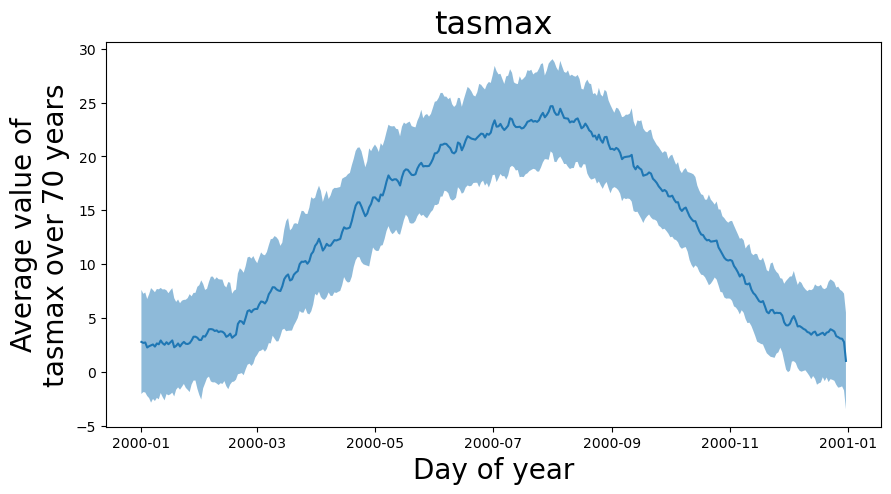

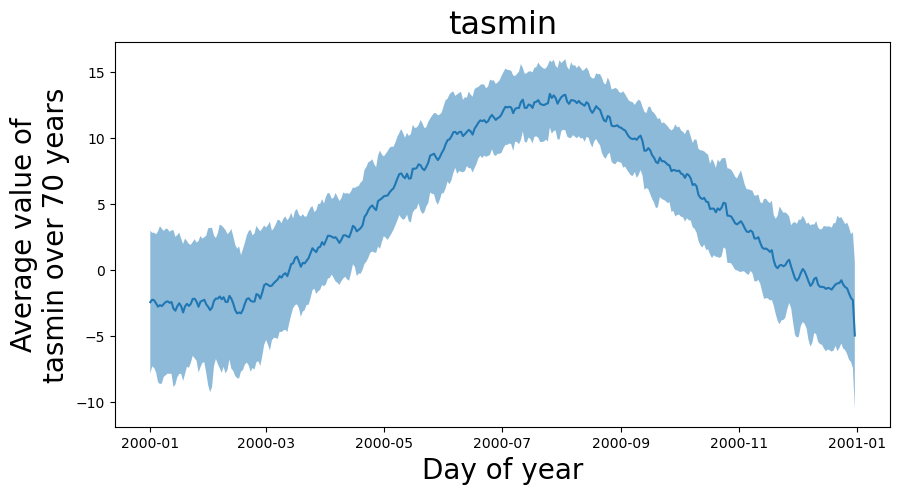

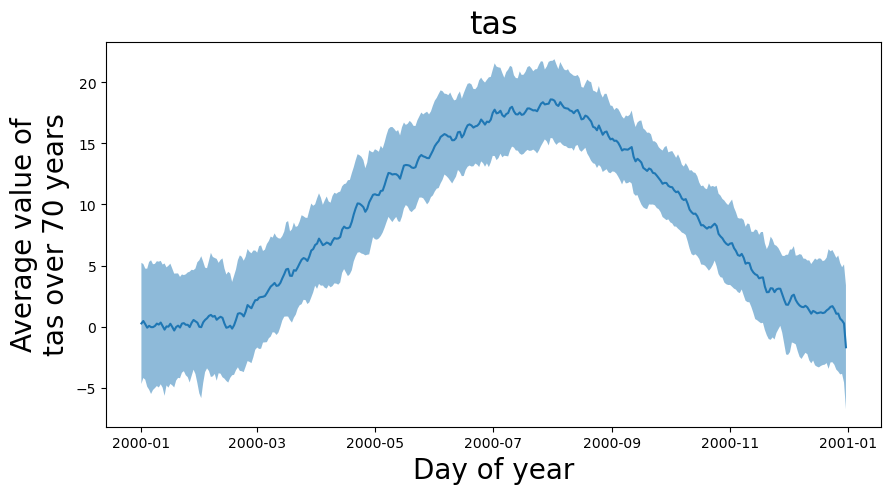

In [35]:
plot_averages(ds_max, 'tasmax')
plot_averages(ds_min, 'tasmin')
plot_averages(ds_mean, 'tas')